<a href="https://colab.research.google.com/github/DieuMerci225/Count-Evens-MASTER/blob/master/L04_Shelling_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [L04: Implementing the Shelling Model](https://docs.google.com/document/d/1NtGAKnsfwLRYMYrL74aMVMtTuQRJ1oDjvSFWlmMjpzs/edit?usp=sharing)
Written by Dr. Jan Pearce, Berea College

Complete the code by meeting all linked requirements and fixing all FIXMEs

## Your Name: DieuMerci Nshizirungu

**SUMMARY**: A brief summary description of the design and implementation, including how much your initial design plan evolved, the final result you achieved and the amount of time you spent as a programmer or programmers in accomplishing these results. This should be no more than two paragraphs.

For this lab I implemented our Schelling segregation model in Python using the object oriented design from my T12 team work. I created a grid based city, placed red and blue agents based on user parameters, and then repeatedly checked if agents were happy with their neighbors or needed to move to an empty spot. The model also tracks segregation and shows the grid changing over time.
As I coded, I simplified a few things from the original design so the code stayed readable. The final result lets the user choose the grid size, occupation rate, red to blue ratio, and how many similar neighbors an agent needs. It can start with either a random city or a layout from a file, runs until the neighborhood settles, and reports how segregation changed and how many moves happened.

**PERSONNEL**: A description of who you worked with and on what sections.  It is expected that all collaboration is done as pair programming together. Also, note these collaborations in the code section itself.

I worked alone on the implementation of this lab. I used the T12 design document that I created earlier as the starting point for the class and method structure. I did not pair program on the code itself. Any conversations with classmates stayed at the level of how the Schelling model behaves in general, not specific code.

**CHALLENGES**: Descriptions of the largest challenges you overcame and what made them challenging.

My biggest challenge was turning the design ideas into a working model without making the code too complicated. Getting the neighbor logic right for corners and edges took a bit of trial and error. I also had to think carefully about how to decide if an agent is happy and how to pick good empty spots for them to move to so the model matched what we described in the design.

**INNOVATIONS**: Any innovations that were not specifically required by the assignment. These are not required, but should be highlighted if included.

I did not add major extra features beyond what the assignment required. One small improvement is that I added a simple satisfaction measure and a stop condition that checks when all agents are happy or no one moves any more, which makes it easier to see when the model has stabilized.

**TESTING**: Describe how you tested this work.

I used a small set of unit tests with unittest I used a small set of unit tests with check_happiness returns a boolean, and that the segregation score always stays between 0 and 1. Besides the tests, I also ran the full simulation several times with small grid sizes and different parameter values to see if the movement and segregation patterns looked reasonable.

**ERRORS**: A list in bulleted form of all known errors and deficiencies.

At one point the empty spots list was not updating correctly after movement. I fixed it by removing the new spot and adding the old spot back into the list.
I originally checked happiness using a percentage instead of a simple count of similar neighbors, which did not match the design. Switching to the count method fixed it.
The file based initialization only works correctly if the file size matches the grid. If the file has fewer rows or shorter lines, the rest of the grid is left empty.
There is no strong input validation, so unusual values like 0 percent occupation or extremely strict content levels may lead to odd behavior.
The visualization can run slowly on larger grids because it redraws the entire grid every round.

**COMMENTS**: A paragraph or so of your own comments on and reactions to the Lab.

This lab helped me see how the abstract ideas of the Schelling model turn into actual code. It was interesting to watch how small local rules about neighbors can still create a lot of segregation in the city over time. It also gave me more practice writing object oriented Python and keeping everything in one main class instead of just using one big script. Overall I think this lab tied together complexity, simulation, and software design in a useful way.

## Import Libraries

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import unittest
import random
from urllib.request import urlopen

## The Schelling Model

CSC445 L04 Schelling Model
width: 144
height: 144
occupation %: 30
red %: 30
similar neighbors needed: 35
random start? (y/n): y


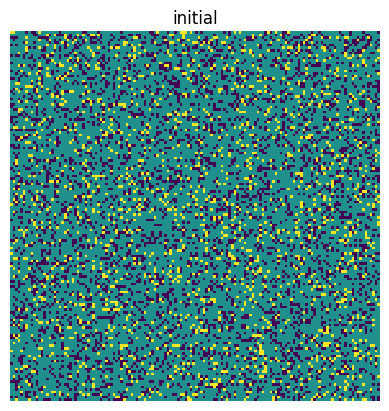

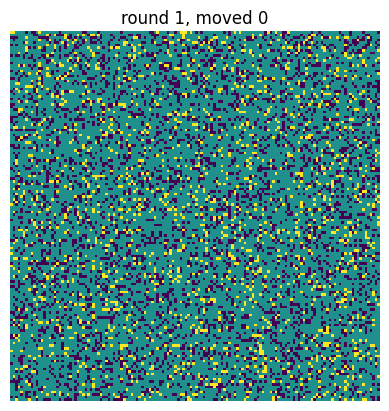


Results:
start segregation: 0.5750846310088016
end segregation: 0.5750846310088016
moves: 0


KeyboardInterrupt: Interrupted by user

In [8]:
import random

"""

add code here being sure to use object oriented design

"""




class Agent:
    """Agent with a color."""

    def __init__(self, color):
        """color: str"""
        self.color = color


class SchellingModel:
    """Schelling model grid."""

    def __init__(self, grid_width, grid_height, fill_rate, group_ratio, content_level):
        """
        grid_width, grid_height: int
        fill_rate, group_ratio: float
        content_level: int
        """
        self.grid_width = grid_width
        self.grid_height = grid_height
        self.fill_rate = fill_rate
        self.group_ratio = group_ratio
        self.content_level = content_level
        self.grid = [[None for _ in range(grid_width)]
                     for _ in range(grid_height)]
        self.moves = 0

    def get_neighbors(self, r, c):
        """Return neighbor coords."""
        out = []
        for dr in [-1, 0, 1]:
            for dc in [-1, 0, 1]:
                if dr == 0 and dc == 0:
                    continue
                rr, cc = r + dr, c + dc
                if 0 <= rr < self.grid_height and 0 <= cc < self.grid_width:
                    out.append((rr, cc))
        return out

    def count_similar(self, r, c, color):
        """Return (similar, total) neighbors."""
        same = 0
        tot = 0
        for nr, nc in self.get_neighbors(r, c):
            a = self.grid[nr][nc]
            if a:
                tot += 1
                if a.color == color:
                    same += 1
        return same, tot

    def empty_spots(self):
        """Return empty cells."""
        out = []
        for r in range(self.grid_height):
            for c in range(self.grid_width):
                if self.grid[r][c] is None:
                    out.append((r, c))
        return out

    def select_spot(self):
        """Return shuffled occupied cells."""
        xs = []
        for r in range(self.grid_height):
            for c in range(self.grid_width):
                if self.grid[r][c]:
                    xs.append((r, c))
        random.shuffle(xs)
        return xs

    def check_happiness(self, r, c):
        """True if agent happy."""
        a = self.grid[r][c]
        if a is None:
            return True
        same, tot = self.count_similar(r, c, a.color)
        if tot == 0:
            return True
        return same >= self.content_level

    def move_unhappy_spots(self):
        """Move unhappy agents once, return # moved."""
        moved = 0
        empties = self.empty_spots()
        if not empties:
            return 0

        for r, c in self.select_spot():
            a = self.grid[r][c]
            if not a:
                continue
            if self.check_happiness(r, c):
                continue

            good = []
            for er, ec in empties:
                same, tot = self.count_similar(er, ec, a.color)
                if same >= self.content_level:
                    good.append((er, ec))

            if not good:
                continue

            nr, nc = random.choice(good)
            self.grid[nr][nc] = a
            self.grid[r][c] = None
            empties.remove((nr, nc))
            empties.append((r, c))
            moved += 1
            self.moves += 1

        return moved

    def initialize_random(self):
        """Randomly fill grid."""
        total = self.grid_width * self.grid_height
        occ = int(total * (self.fill_rate / 100))
        red = int(occ * (self.group_ratio / 100))
        blue = occ - red

        spots = [(r, c) for r in range(self.grid_height)
                 for c in range(self.grid_width)]
        random.shuffle(spots)

        for r, c in spots[:red]:
            self.grid[r][c] = Agent("R")
        for r, c in spots[red:red+blue]:
            self.grid[r][c] = Agent("B")

    def initialize_from_lines(self, lines):
        """Load grid from text."""
        for r in range(min(self.grid_height, len(lines))):
            row = lines[r]
            for c in range(min(self.grid_width, len(row))):
                ch = row[c].upper()
                if ch == "R":
                    self.grid[r][c] = Agent("R")
                elif ch == "B":
                    self.grid[r][c] = Agent("B")
                else:
                    self.grid[r][c] = None

    def segregation(self):
        """Return segregation score 0–1."""
        same = 0
        tot = 0
        for r in range(self.grid_height):
            for c in range(self.grid_width):
                a = self.grid[r][c]
                if not a:
                    continue
                for nr, nc in self.get_neighbors(r, c):
                    if (nr, nc) <= (r, c):
                        continue
                    b = self.grid[nr][nc]
                    if b:
                        tot += 1
                        if b.color == a.color:
                            same += 1
        return same/tot if tot else 0.0

    def satisfaction(self):
        """Return fraction of happy agents."""
        happy = 0
        total = 0
        for r in range(self.grid_height):
            for c in range(self.grid_width):
                if self.grid[r][c]:
                    total += 1
                    if self.check_happiness(r, c):
                        happy += 1
        return happy/total if total else 1.0

    def draw(self, title=None):
        """Plot grid."""
        m = []
        for r in range(self.grid_height):
            row = []
            for c in range(self.grid_width):
                a = self.grid[r][c]
                if a is None:
                    row.append(0)
                else:
                    row.append(1 if a.color == "R" else -1)
            m.append(row)

        plt.clf()
        plt.imshow(m, interpolation="nearest")
        plt.axis("off")
        if title:
            plt.title(title)
        plt.pause(0.1)

    def run(self, max_rounds=50, animate=True):
        """Run model."""
        start = self.segregation()
        if animate:
            plt.figure()
            self.draw("initial")

        for i in range(max_rounds):
            moved = self.move_unhappy_spots()
            if animate:
                self.draw(f"round {i+1}, moved {moved}")
            if moved == 0 or self.satisfaction() >= 1:
                break

        end = self.segregation()
        return start, end, self.moves


class TestModel(unittest.TestCase):
    """Simple tests."""

    def setUp(self):
        """3x3 test grid."""
        self.m = SchellingModel(3, 3, 100, 50, 1)
        self.m.grid = [
            [Agent("R"), Agent("B"), Agent("R")],
            [Agent("B"), Agent("R"), Agent("B")],
            [Agent("R"), None,        Agent("R")]
        ]

    def test_neighbors(self):
        self.assertEqual(len(self.m.get_neighbors(0, 0)), 3)

    def test_happy_bool(self):
        self.assertIsInstance(self.m.check_happiness(1, 1), bool)

    def test_segregation(self):
        s = self.m.segregation()
        self.assertTrue(0 <= s <= 1)


def run_tests():
    """Run tests."""
    unittest.main(argv=["ignored"], exit=False)


def get_params():
    """Get user model params."""
    w = int(input("width: "))
    h = int(input("height: "))
    fill = float(input("occupation %: "))
    red = float(input("red %: "))
    need = int(input("similar neighbors needed: "))
    return w, h, fill, red, need


def init_choice(model):
    """Random or file init."""
    k = input("random start? (y/n): ").strip().lower()
    if k == "y":
        model.initialize_random()
    else:
        path = input("file or url: ").strip()
        if path.startswith("http"):
            with urlopen(path) as f:
                lines = [line.decode().strip() for line in f]
        else:
            with open(path) as f:
                lines = [line.strip() for line in f]
        model.initialize_from_lines(lines)


def main():
    """Driver."""
    print("CSC445 L04 Schelling Model")
    w, h, fill, red, need = get_params()
    m = SchellingModel(w, h, fill, red, need)
    init_choice(m)

    start, end, moves = m.run(max_rounds=50, animate=True)
    print("\nResults:")
    print("start segregation:", start)
    print("end segregation:", end)
    print("moves:", moves)

    t = input("run tests? (y/n): ").strip().lower()
    if t == "y":
        run_tests()


main()

## Integrity statement

Please briefly describe all references you used, all help you received and all help you gave to others in completing this assignment. Be sure to say that you got no help if you got none.

I completed this implementation myself using the T12 design I created during the design phase. I talked with classmates only about the general behavior of the Schelling model, not about specific code. For coding help, I referred to course materials and used ChatGPT to help me think through errors and structure some functions, but I wrote and edited the final code on my own. I did not give anyone else code for this lab.
